<a href="https://colab.research.google.com/github/erbisti/Collab/blob/main/RNN_sin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2012
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0188 
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0058 
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037 
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021 
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013 
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.8203e-04 
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.7406e-04 
Epoch 9/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.0352e-04 
Epoch 10/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.2000e-04 
Epoch 11/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7820e-04 
Epoch 12/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5869e-04 
Epoch 13/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4835e-04 
Epoch 14/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3967e-04 
Epoch 15/20
14/14 ━━━━━━━━━━━━━━━━━

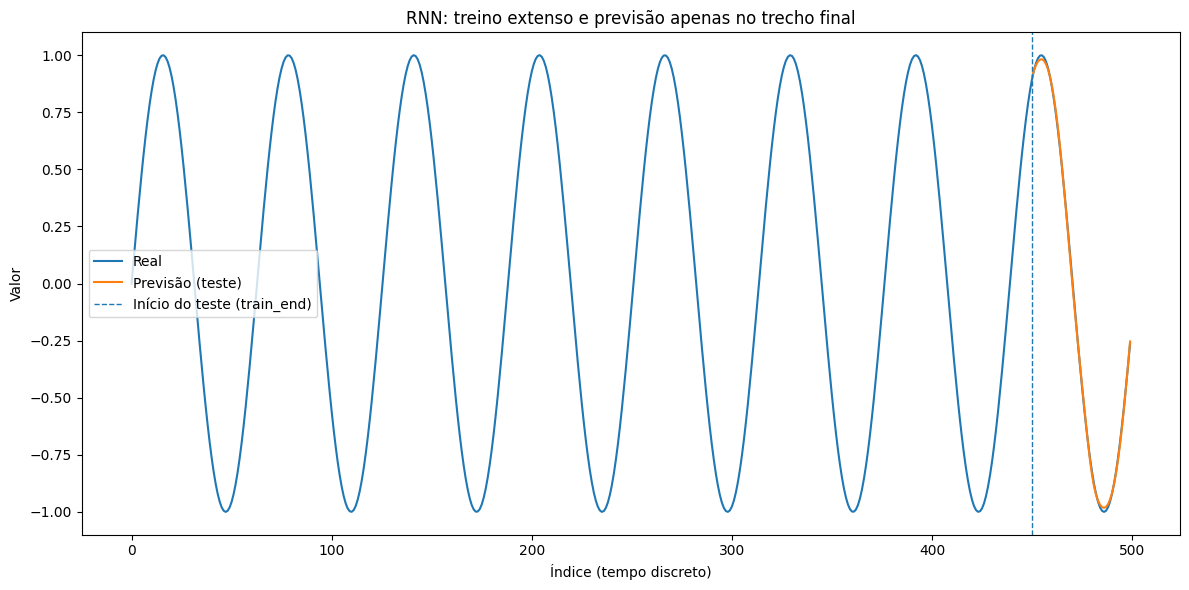

MSE no teste: 0.000094

Parâmetros usados:
 - n_steps  = 10 (tamanho da janela por amostra)
 - test_len = 50 (tamanho do trecho previsto no final)
 - rnn_units= 50 (neurônios na SimpleRNN)
 - epochs   = 20
 - batch_sz = 32
Dimensões:
 - X total  : (490, 10, 1), Y total: (490,)
 - Treino   : X_train (440, 10, 1), Y_train (440,)
 - Teste    : X_test  (50, 10, 1),  Y_test  (50,)


In [2]:
# ==============================================
# RNN para previsão unipasso em série temporal
# - Treina no início da série
# - Prevê apenas o trecho final (teste)
# - Código claro, executável e comentado
# ==============================================

# ------------------------------
# Imports
# ------------------------------
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.random import set_seed

# ------------------------------
# Reprodutibilidade (opcional)
# ------------------------------
np.random.seed(42)
set_seed(42)

# ------------------------------
# Geração de dados de exemplo
# ------------------------------
# Série senoidal: 500 pontos entre 0 e 50
N_PONTOS = 500
X_MAX = 50.0
x = np.linspace(0, X_MAX, N_PONTOS)
y = np.sin(x)  # série alvo

# ------------------------------
# Função utilitária: janela deslizante
# ------------------------------
def create_dataset(seq, n_steps):
    """
    Constrói pares (X, Y) usando janela de tamanho n_steps.
    - X[i] = seq[i : i+n_steps]
    - Y[i] = seq[i+n_steps]
    """
    Xs, Ys = [], []
    for i in range(len(seq) - n_steps):
        Xs.append(seq[i:i + n_steps])
        Ys.append(seq[i + n_steps])
    return np.array(Xs), np.array(Ys)

# ------------------------------
# PARÂMETROS DO MODELO E DO SPLIT
# ------------------------------
n_steps   = 10      # tamanho da janela temporal (timesteps por amostra)
test_len  = 50      # tamanho do trecho final reservado para teste/previsão
rnn_units = 50      # número de neurônios na SimpleRNN
epochs    = 20      # épocas de treino
batch_sz  = 32      # tamanho do lote (batch size)

# ------------------------------
# Preparar dataset (X, Y) e checagens
# ------------------------------
X, Y = create_dataset(y, n_steps)              # X: (T-n_steps, n_steps), Y: (T-n_steps,)
X = X.reshape((X.shape[0], X.shape[1], 1))     # RNN espera (amostras, passos, features)

T = len(y)                                     # tamanho da série original
train_end = T - test_len                       # índice (na série original) onde treino termina

# Cada amostra X[i] prevê Y[i] no índice original (i + n_steps).
# Queremos treinar até o alvo < train_end  => i < train_end - n_steps
train_count = train_end - n_steps

# Checagens de sanidade
assert test_len > 0, "test_len deve ser positivo."
assert n_steps > 0, "n_steps deve ser positivo."
assert train_count > 0, "Parâmetros inválidos: aumente T ou reduza test_len/n_steps."
assert train_count <= len(Y), "train_count excede o número de rótulos disponíveis."

# Split temporal: treino no começo, teste no final
X_train, Y_train = X[:train_count], Y[:train_count]
X_test,  Y_test  = X[train_count:], Y[train_count:]

# ------------------------------
# Modelagem: SimpleRNN -> Dense(1)
# ------------------------------
model = Sequential([
    SimpleRNN(rnn_units, activation='tanh', input_shape=(n_steps, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

print(model.summary())

# ------------------------------
# Treinamento
# ------------------------------
history = model.fit(
    X_train, Y_train,
    epochs=epochs,
    batch_size=batch_sz,
    verbose=1
)

# ------------------------------
# Previsões apenas no trecho final (teste)
# ------------------------------
pred_test = model.predict(X_test)  # tamanho esperado = test_len

# ------------------------------
# Visualização
# ------------------------------
plt.figure(figsize=(12, 6))
plt.plot(range(T), y, label='Real')

# A primeira previsão do conjunto de teste corresponde ao índice "train_end" na série original.
plt.plot(
    range(train_end, train_end + len(pred_test)),
    pred_test.flatten(),
    label='Previsão (teste)'
)

# Linha vertical para marcar o corte treino/teste
plt.axvline(train_end, linestyle='--', linewidth=1, label='Início do teste (train_end)')

plt.xlabel('Índice (tempo discreto)')
plt.ylabel('Valor')
plt.title('RNN: treino extenso e previsão apenas no trecho final')
plt.legend()
plt.tight_layout()
plt.show()

# ------------------------------
# Métrica simples no teste (opcional)
# ------------------------------
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, pred_test.flatten())
print(f"MSE no teste: {mse:.6f}")

# ------------------------------
# Observações dos parâmetros (referência rápida)
# ------------------------------
print("\nParâmetros usados:")
print(f" - n_steps  = {n_steps} (tamanho da janela por amostra)")
print(f" - test_len = {test_len} (tamanho do trecho previsto no final)")
print(f" - rnn_units= {rnn_units} (neurônios na SimpleRNN)")
print(f" - epochs   = {epochs}")
print(f" - batch_sz = {batch_sz}")
print(f"Dimensões:")
print(f" - X total  : {X.shape}, Y total: {Y.shape}")
print(f" - Treino   : X_train {X_train.shape}, Y_train {Y_train.shape}")
print(f" - Teste    : X_test  {X_test.shape},  Y_test  {Y_test.shape}")
